In [140]:
import numpy as np
import matplotlib.pyplot as plt
import MatplotlibSettings

In [233]:
x = np.array([8,8.5])          # Central values
s = x * np.array([0.02, 0.02]) # Relative uncorrelated uncertainties
n = 0.1                        # Common, relative normalisation uncertainty

# Best fit value and it uncertainty
mubar  = ( x[0] / s[0]**2 + x[1] / s[1]**2 ) / ( 1 / s[0]**2 + 1 / s[1]**2 + ( ( n * x[0] - n * x[1] ) / s[0] / s[1] )**2 )
dmubar = ( 1 + n**2 * x[0]**2 / s[0]**2 + n**2 * x[1]**2 / s[1]**2 ) / ( 1 / s[0]**2 + 1 / s[1]**2 + ( ( n * x[0] - n * x[1] ) / s[0] / s[1] )**2 )

# Nuisance parameter and shifted values
lamb   = ( n * x[0]**2 / s[0]**2 + n * x[1]**2 / s[1]**2 ) / ( 1 + n**2 * x[0]**2 / s[0]**2 + n**2 * x[1]**2 / s[1]**2 )- mubar * ( n * x[0] / s[0]**2 + n * x[1] / s[1]**2 ) / ( 1 + n**2 * x[0]**2 / s[0]**2 + n**2 * x[1]**2 / s[1]**2 )
muhat = mubar + lamb * n * x

# Covariance matrix
V = np.array([[n**2 * x[i] * x[j] for i in range(2)] for j in range(2)]) + np.diag(s**2)

# Chi2 check
print(np.matmul(mubar-x,np.matmul(np.linalg.inv(V),mubar-x)), sum(((x-muhat)/s)**2)+lamb**2, mubar, dmubar, muhat)

95.25608823454759 95.25608823454787 0.41314819446105655 0.06133079909097827 [ 8.03363525 77.09429922]


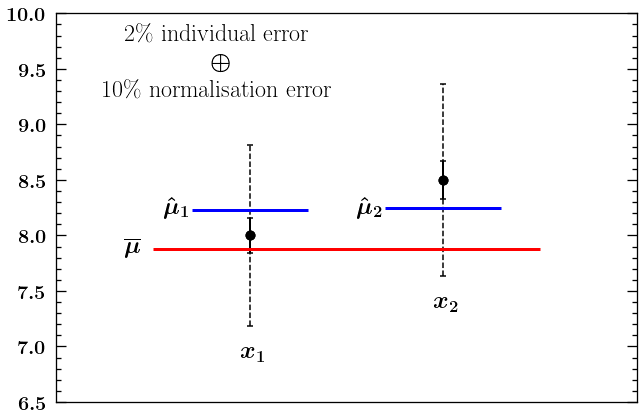

In [232]:
plt.xlim(-1, 2)
plt.ylim(6.5, 10)
plt.text(-0.05, 6.9, r"$x_1$")
plt.text(0.95, 7.35, r"$x_2$")
plt.text(-0.65, 7.85, r"$\overline{\mu}$")
plt.text(-0.45, 8.2, r"$\hat{\mu}_1$")
plt.text(0.55, 8.2, r"$\hat{\mu}_2$")
plt.text(-0.65, 9.75, r"2\% individual error")
plt.text(-0.2, 9.5, r"$\oplus$")
plt.text(-0.76, 9.25, r"10\% normalisation error")
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.errorbar([0, 1], x, s, elinewidth = 2, capsize = 3, capthick = 1.5, markersize = 10, fmt = "ko")
eb = plt.errorbar([0, 1], x, np.sqrt(s**2 + (n * x)**2), elinewidth = 1.5, capsize = 3, capthick = 1.5, markersize = 10, fmt = "ko")
eb[-1][0].set_linestyle('--')
plt.hlines(mubar, -0.5, 1.5, colors = "red")
plt.hlines(muhat[0], -0.3, 0.3, colors = "blue")
plt.hlines(muhat[1], 0.7, 1.3, colors = "blue")
plt.savefig("DAgostiniExample.pdf")